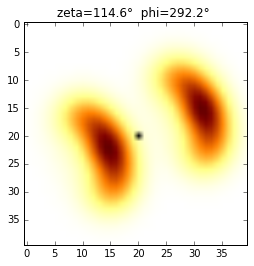

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import math
from ipywidgets import interact, fixed

def get_point_sphere(dist,psi,zeta):
    x = dist*np.sin(zeta)*np.cos(psi)
    y = dist*np.sin(zeta)*np.sin(psi)
    z = dist*np.cos(zeta)
    return x,y,z


def fonction(X,Y,Z,psi,zeta,beta,r,thick,N,gamma):
    thick2 = thick*thick
    cospsi = np.cos(psi)
    sinpsi = np.sin(psi)
    costh = np.cos(zeta)
    sinth = np.sin(zeta)
    xtmp = X*sinpsi-Y*cospsi

    xprim = -X*cospsi-Y*sinpsi    
    yprim = xtmp*costh+Z*sinth
    zprim = -xtmp*sinth+Z*costh
    
    rprim = np.sqrt(xprim**2+yprim**2)
    norm = N/(2*np.pi*thick)**2/r
    doppler = (1-beta*yprim*sinth/rprim)**(-1-gamma)
    torus = np.exp(-(0.5/thick2)*(zprim**2+(rprim-r)**2))
    
    return norm*torus*doppler

def Torus(pars,x,y):
    (psi, zeta, r, dist, thick, beta, N, xpos, ypos) = pars
    z_max = np.max( [r + 4.*thick, 1.1*dist] )
#    z_max = r + 4.*thick

    nb = 300
    dz = 2*z_max/nb
    z_array = np.arange(-z_max,z_max,dz)
    xn = x - xpos
    yn = y - ypos
    XN,Z1 = np.meshgrid(xn,z_array)
    YN,Z2 = np.meshgrid(yn,z_array)
    
#    dist=15
#    print(zeta,psi)

    xoff,yoff,zoff = get_point_sphere(dist, psi,zeta)
    
    f_z = fonction(XN-xoff,YN-yoff,Z1-zoff,psi+3.14/2,zeta,beta,r,thick,N,1.5)
    
    xoff,yoff,zoff = get_point_sphere(-dist, psi,zeta)
    
    f_z1 = fonction(XN-xoff,YN-yoff,Z1-zoff,psi+3.14/2,zeta,beta,r,thick,N,1.5)
    
    C = sum(f_z+f_z1,0)*dz
#    C = sum(f_z,0)*dz

    return C

size=40
xpsr=int(size/2)
ypsr=int(size/2)
r= 8
dist=15
thick=3.
psi, zeta, r, dist, thick, beta, N, xpos, ypos = math.pi*70/180,math.pi*115/180,r,dist,thick,0.5,2,xpsr,ypsr

def plot_torus(psi, zeta, dist):
    
    x = np.arange(0, size)
    y = np.arange(0, size)
    im=np.zeros((len(x),len(y)))
    for i in x:
        for j in y:
            im[i,j]=Torus((psi, zeta, r, dist, thick, beta, N, xpos, ypos),i,j)
    im[xpsr,ypsr]=0.1
    plt.imshow(im,vmax=0.03,cmap='afmhot_r')
    xoff,yoff,zoff = get_point_sphere(dist, zeta,psi)
#    plt.title('x=%.1f y=%.1f z=%.1f for zeta=%.2f phi=%.2f sum=%.3f'%(xoff,yoff,zoff,zeta,psi,np.sum(im,axis=(0,1)) ) )
    plt.title('zeta=%.1f°  phi=%.1f° '%(np.rad2deg(zeta),np.rad2deg(psi) ) )
#    plt.axis('off') 
    plt.show()
    
interact(plot_torus,psi=(0,3.14*2),zeta=(0,3.14),dist=(0,20))    